#### In this example we will be looking at MaximumLikelihoodEstimator and BayesianEstimator

In [1]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.estimators import BayesianEstimator
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Lets consider we have 1000 samples of previous data on individual performance.
#### Based on this observation, we can estimate the parameters on how practice analysis effects match performance etc.

In [2]:
# lets generate random data; say these are the previous samples
sample_size = 20
raw_data = np.random.randint(low=0, high=2,size=(sample_size, 4))
raw_data

array([[1, 0, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 1, 1],
       [0, 1, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 1, 1],
       [0, 1, 0, 1],
       [1, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 1, 0, 1],
       [1, 1, 0, 1],
       [1, 1, 1, 0],
       [0, 1, 1, 1],
       [0, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 1, 0, 1],
       [0, 1, 0, 1]])

In [3]:
data = pd.DataFrame(raw_data, columns=['Pa', 'Fi', 'Pr', 'Ma'])

In [4]:
# lets define the individual cricket performance model 
cric_perf_model = BayesianModel([('Pa', 'Fi'), ('Pa', 'Pr'), ('Fi', 'Ma'),
                               ('Pr', 'Ma')])

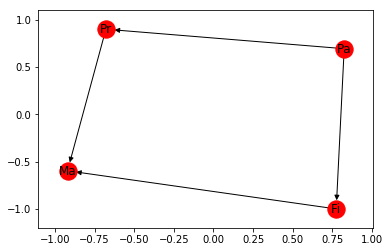

In [5]:
nx.draw_networkx(cric_perf_model)
plt.show()

In [6]:
# calling the fit method by passing the estimator to learn the parameters
cric_perf_model.fit(data, estimator=MaximumLikelihoodEstimator)

In [7]:
cric_perf_model.get_cpds()

[<TabularCPD representing P(Fi:2 | Pa:2) at 0x7f4ebe1c4cf8>,
 <TabularCPD representing P(Ma:2 | Fi:2, Pr:2) at 0x7f4ebe1c4908>,
 <TabularCPD representing P(Pa:2) at 0x7f4ebe1c49b0>,
 <TabularCPD representing P(Pr:2 | Pa:2) at 0x7f4ebe1c4630>]

In [8]:
print(cric_perf_model.get_cpds('Ma'))

+-------+--------------------+--------------------+-------+-------+
| Fi    | Fi(0)              | Fi(0)              | Fi(1) | Fi(1) |
+-------+--------------------+--------------------+-------+-------+
| Pr    | Pr(0)              | Pr(1)              | Pr(0) | Pr(1) |
+-------+--------------------+--------------------+-------+-------+
| Ma(0) | 0.3333333333333333 | 0.2857142857142857 | 0.25  | 0.5   |
+-------+--------------------+--------------------+-------+-------+
| Ma(1) | 0.6666666666666666 | 0.7142857142857143 | 0.75  | 0.5   |
+-------+--------------------+--------------------+-------+-------+


#### Now, lets have a look at BayesianEstimation 
#### Bayesian estimation adjusts the prior belief based on the number of samples it has seen.
#### So the results will be different for 10 and 1000 samples unlike MLE

In [9]:
# lets define the individual cricket performance model 
cric_perf_model = BayesianModel([('Pa', 'Fi'), ('Pa', 'Pr'), ('Fi', 'Ma'),
                               ('Pr', 'Ma')])

In [10]:
cric_perf_model.fit(data, estimator=BayesianEstimator)

In [11]:
print(cric_perf_model.get_cpds('Ma'))

+-------+---------------------+--------------------+---------------------+-------+
| Fi    | Fi(0)               | Fi(0)              | Fi(1)               | Fi(1) |
+-------+---------------------+--------------------+---------------------+-------+
| Pr    | Pr(0)               | Pr(1)              | Pr(0)               | Pr(1) |
+-------+---------------------+--------------------+---------------------+-------+
| Ma(0) | 0.38235294117647056 | 0.3181818181818182 | 0.28378378378378377 | 0.5   |
+-------+---------------------+--------------------+---------------------+-------+
| Ma(1) | 0.6176470588235294  | 0.6818181818181818 | 0.7162162162162162  | 0.5   |
+-------+---------------------+--------------------+---------------------+-------+


#### You can change the sample size and see how different parameters are wrt MLE.